# Clustering

This section tries to cluster the different politicians based on their written words recieved from the data cleaning. The hypothesis is that the candidates will cluster together with their colleagues from their own party, but a fun tendency could be the exact opposite. 

## Data preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
df_politicians = pd.read_csv("Data/similarity_distance_minhash.csv")
df_politicians.set_index("Unnamed: 0", inplace=True)
df_politicians.index.name = None
df_politicians

,magnus_heunicke,nicolai_wammen,mattias_tesfaye,jakob_ellemann,soren_gade,sophie_lohde,lars_lokke,jakob_engel_schmidt,monika_rubin,jacob_mark,...,katrine_robsoe,pernille_vermund,lars_mathiesen,kim_andersen,franciska_rosenkilde,christina_olumeko,torsten_gejl,morten_messerschmidt,pia_kjarsgaard,peter_kofod
magnus_heunicke,0.000000,0.890943,0.816568,0.846154,0.960139,0.841699,0.859316,0.814229,0.734177,0.837209,...,0.901099,0.859316,0.832685,0.909091,0.878505,0.901099,0.876404,0.863636,0.886827,0.878505
nicolai_wammen,0.890943,0.000000,0.899083,0.905109,0.958333,0.922801,0.911071,0.874296,0.886827,0.926655,...,0.941799,0.901099,0.911071,0.924731,0.913043,0.954704,0.913043,0.872180,0.876404,0.870056
mattias_tesfaye,0.816568,0.899083,0.000000,0.850575,0.938053,0.834951,0.870056,0.739496,0.757764,0.872180,...,0.918919,0.843931,0.865784,0.876404,0.895028,0.905109,0.832685,0.787879,0.775510,0.787879
jakob_ellemann,0.846154,0.905109,0.850575,0.000000,0.941799,0.830409,0.809524,0.773006,0.797595,0.861480,...,0.888889,0.850575,0.841699,0.828125,0.932384,0.920863,0.874296,0.874296,0.809524,0.841699
soren_gade,0.960139,0.958333,0.938053,0.941799,0.000000,0.965517,0.972603,0.958333,0.951049,0.970840,...,0.951049,0.961938,0.961938,0.981324,0.954704,0.970840,0.961938,0.961938,0.943662,0.956522
sophie_lohde,0.841699,0.922801,0.834951,0.830409,0.965517,0.000000,0.854962,0.821218,0.814229,0.843931,...,0.915009,0.854962,0.865784,0.861480,0.926655,0.903108,0.848369,0.814229,0.843931,0.876404
lars_lokke,0.859316,0.911071,0.870056,0.809524,0.972603,0.854962,0.000000,0.787879,0.825832,0.861480,...,0.916968,0.882682,0.872180,0.899083,0.932384,0.878505,0.872180,0.874296,0.874296,0.872180
jakob_engel_schmidt,0.814229,0.874296,0.739496,0.773006,0.958333,0.821218,0.787879,0.000000,0.648649,0.811881,...,0.886827,0.800000,0.780488,0.839458,0.905109,0.880597,0.790323,0.747390,0.762887,0.797595
monika_rubin,0.734177,0.886827,0.757764,0.797595,0.951049,0.814229,0.825832,0.648649,0.000000,0.760331,...,0.846154,0.811881,0.823529,0.818898,0.863636,0.863636,0.795181,0.816568,0.800000,0.816568
jacob_mark,0.837209,0.926655,0.872180,0.861480,0.970840,0.843931,0.861480,0.811881,0.760331,0.000000,...,0.895028,0.865784,0.818898,0.863636,0.872180,0.895028,0.834951,0.874296,0.907104,0.895028


In [ ]:
others = pd.read_csv('Data/similarity_distance_minhash_all.csv')
others.set_index("Unnamed: 0", inplace=True)
others.index.name = None
others = others.tail(6)

In [ ]:
parties = list(pd.read_csv("Data/Giant.csv").Party) #+ ["others"]*6

marker_dic = {'socialdemokratiet' : "$A$",
                'radikale' : "$B$",
                'venstre' : "$V$",
                'alternativet' : "$Å$",
                'moderaterne' : "$M$",
                'enhedslisten' : "$Ø$",
                'sf' : "$S$",
                'liberal_alliance' : "$L$",
                'dansk_folkeparti' : "$O$",
                'danmarksdemokraterne' : "$Æ$",
                'nye_borgerlige' : "$N$",
                'konservative' : "$C$"}
                #'others' : "$X$"}

d = {'Person': df_politicians.index,
     'Party': parties, 
     'marker': [marker_dic[i] for i in parties]}

scatter_df = pd.DataFrame(d)
#scatter_df

## Hierarchical clustering with affinity being precomputed

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=12, linkage='complete', affinity='precomputed').fit(df_politicians)

12


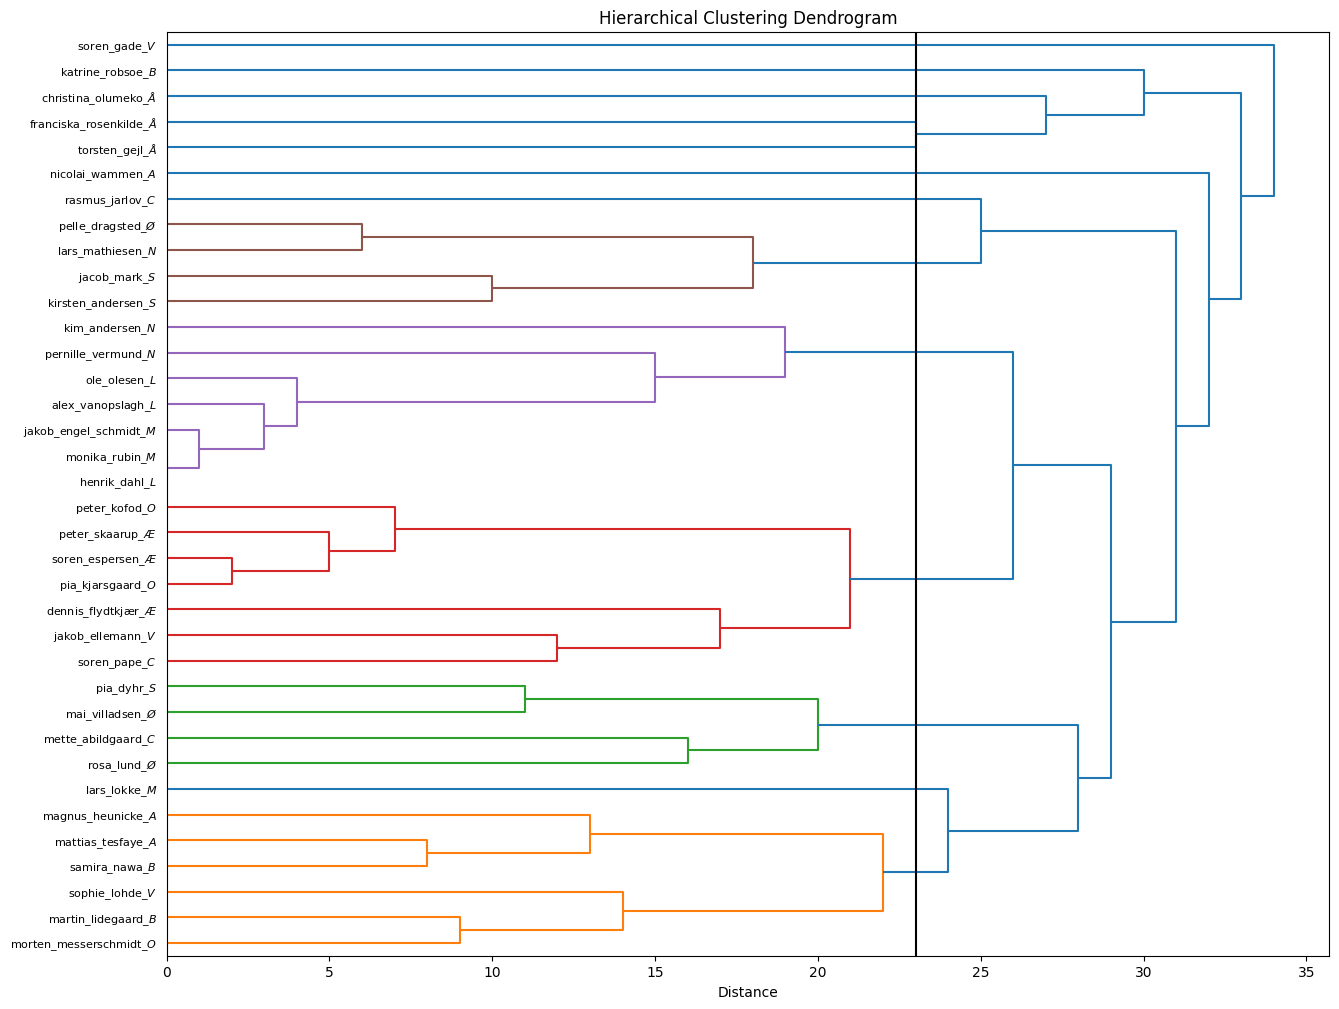

In [ ]:
labelList = df_politicians.index  +"_"+ scatter_df['marker'].values

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    distance = np.arange(model.children_.shape[0])

    linkage_matrix = np.column_stack(
        [model.children_, distance, counts]
    ).astype(float)
    print(len(np.unique(fcluster(linkage_matrix, 23, criterion='distance'))))
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


    
plt.figure(figsize=(15, 12))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agglo, 
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False,
            color_threshold=22.5)
plt.xlabel("Distance")
plt.axvline(x=23, c='k')
plt.show()

## Hierichal clustering with ward distances

In [ ]:
import scipy.spatial.distance as ssd
# convert the redundant n*n square matrix form into a condensed nC2 array
distArray = ssd.squareform(df_politicians) # distArray[{n choose 2}-{n-i choose 2} + (j-i-1)] is the distance between points i and j

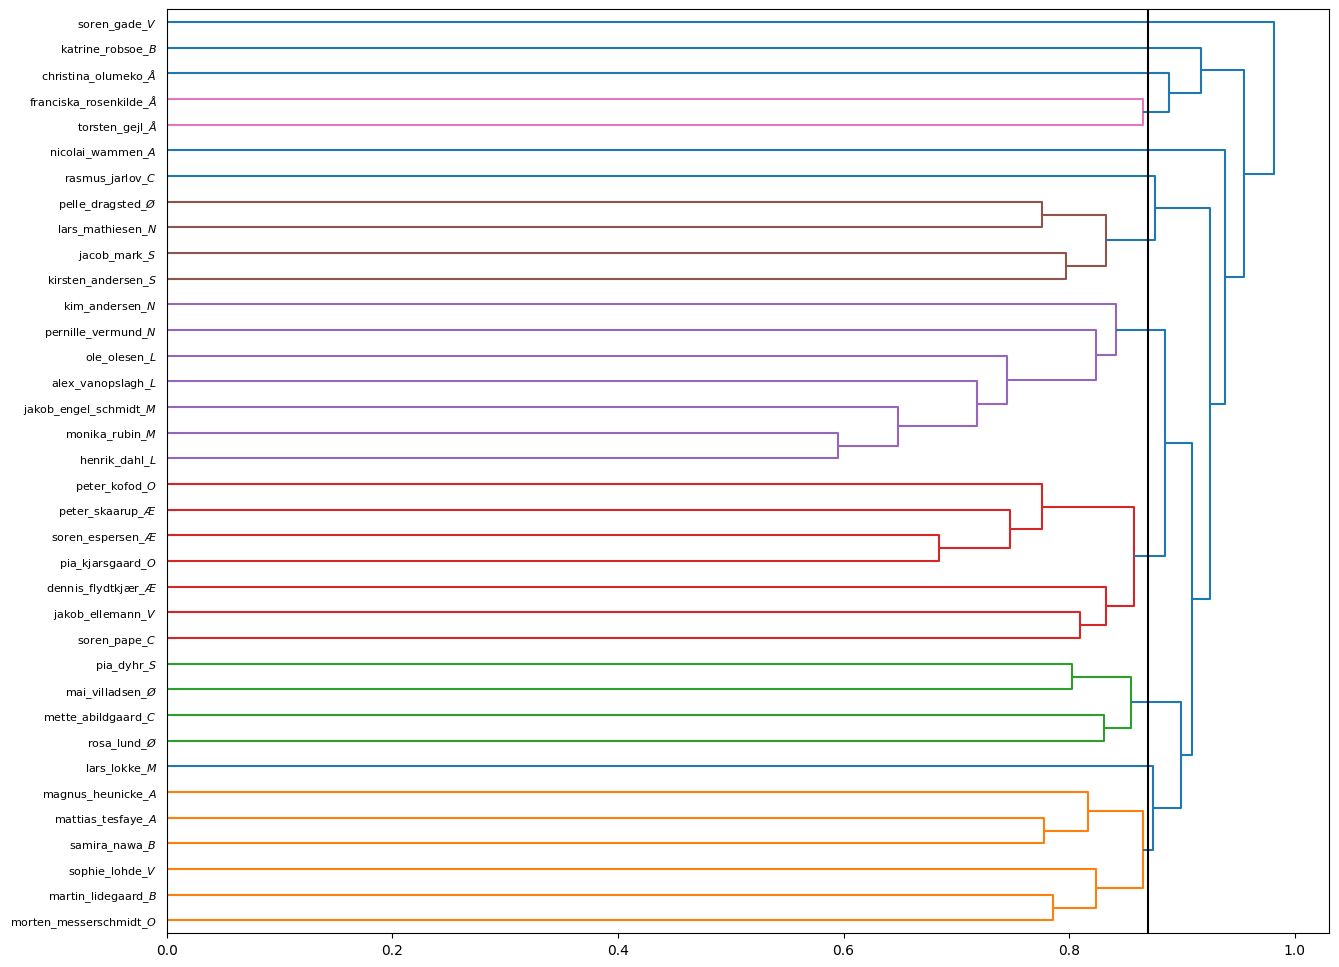

In [ ]:
dendo_data = df_politicians
linked = linkage(distArray, method='complete')

plt.figure(figsize=(15, 12))
d = dendrogram(
            linked,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False,
            color_threshold=0.87 #0.89 for ward, 0.87 for complete
          )
plt.axvline(x=0.87, c='k')
plt.show()

In [ ]:
print(len(np.unique(fcluster(linked, 0.87, criterion='distance'))))
cluster_no_pca = fcluster(linked, 0.87, criterion='distance')

12


In [ ]:
#np.unique(fcluster(linked, 1.354, criterion='distance'))

Text(0.5, 0, 'number of clusters')

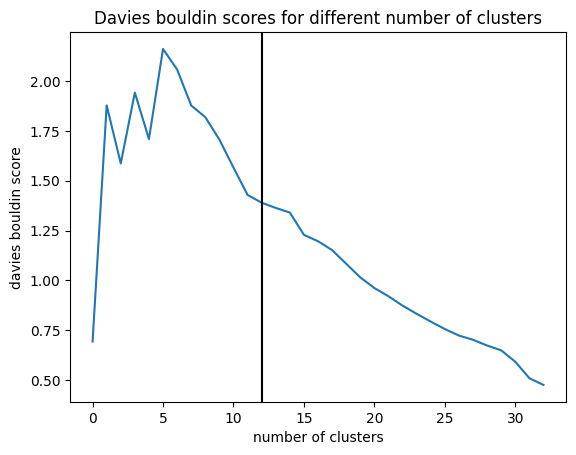

In [ ]:
from scipy.optimize import minimize
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

scores = []

for i in range(2,35):
    agglo = AgglomerativeClustering(n_clusters=i, linkage='complete', affinity='precomputed').fit(df_politicians)
    score = davies_bouldin_score(df_politicians, agglo.labels_)
    scores.append(score)

plt.plot(scores)
plt.axvline(12, c='k')
plt.title("Davies bouldin scores for different number of clusters")
plt.ylabel("davies bouldin score")
plt.xlabel("number of clusters")


## Kmeans Clustering with PCA

In [ ]:
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(df_politicians)

NameError: name 'df_politicians' is not defined

In [ ]:
kmeans = KMeans(n_clusters=12, random_state=0).fit(df)
label = kmeans.labels_

In [ ]:
from sklearn.metrics import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=12, linkage='precomputed').fit(df)

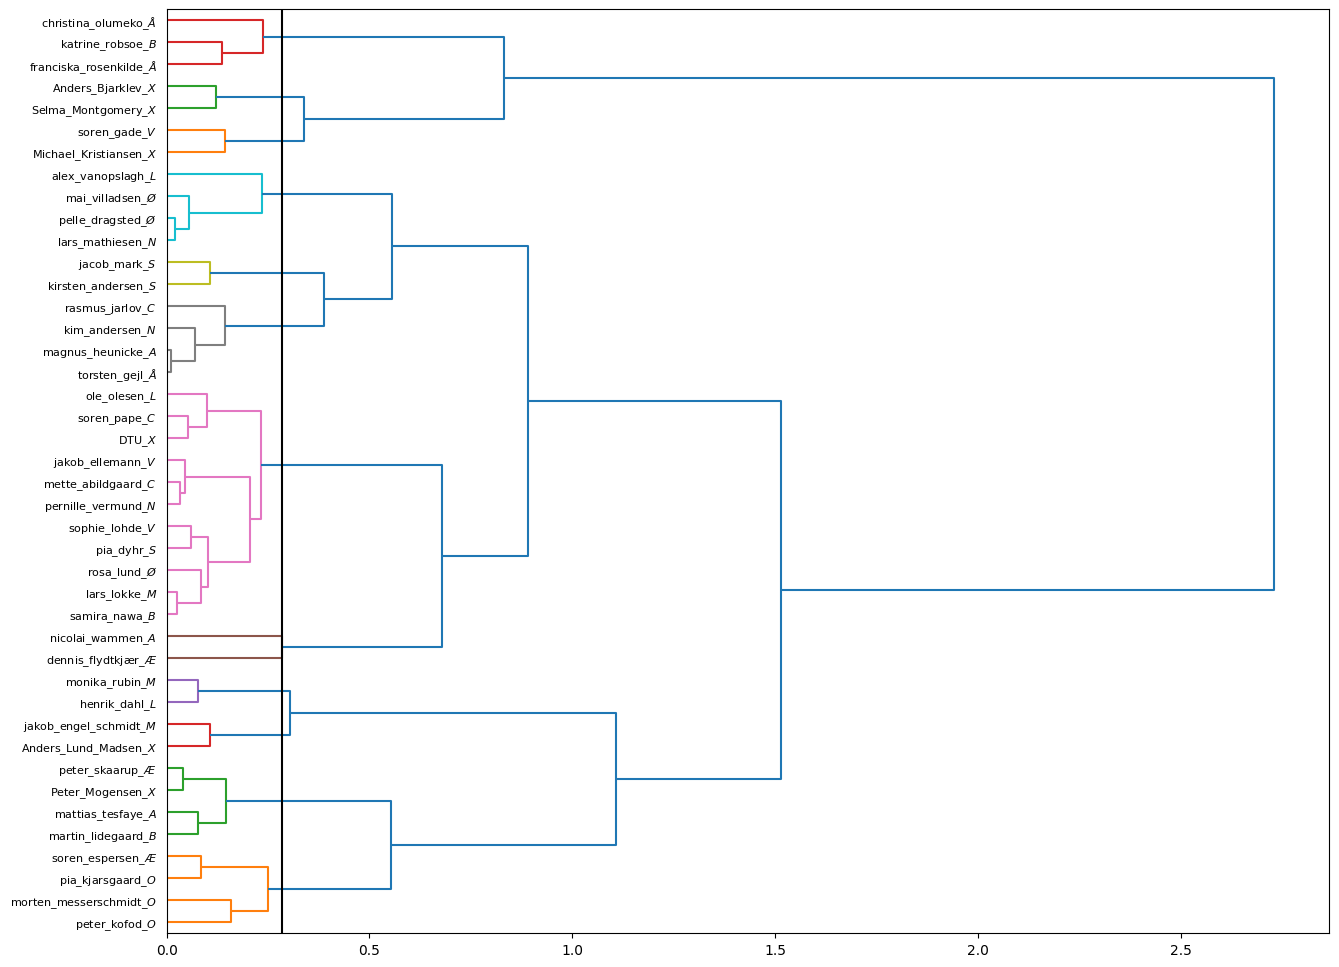

In [ ]:
dendo_data = df
linked = linkage(dendo_data, 'ward')

labelList = df_politicians.index +"_"+ scatter_df['marker'].values

plt.figure(figsize=(15, 12))
d = dendrogram(
            linked,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False,
            color_threshold=0.285
          )
plt.axvline(x=0.285, c='k')
plt.show()

In [ ]:
np.unique(fcluster(linked, 0.285, criterion='distance'))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [ ]:
import random

number_of_colors = 12

d_leaf_color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_18051/2293869081.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(dendo_data[point, 0], dendo_data[point, 1], 'o', color=d_leaf_color[fcluster(linked, 0.285, criterion='distance')[point] - 1], marker=scatter_df['marker'].values[point], markersize=10)


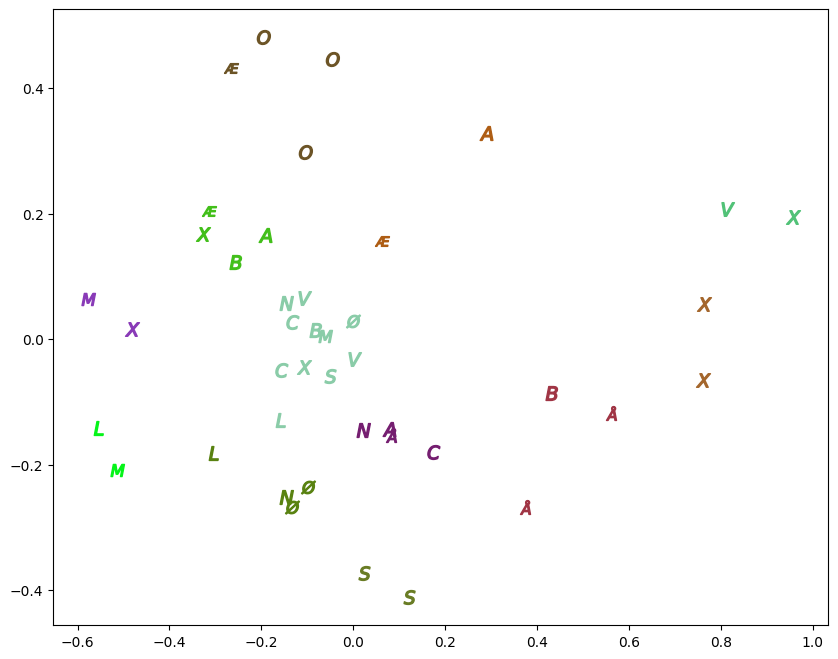

In [ ]:
plt.figure(figsize=(10, 8))

points = d['leaves']
colors = ['none'] * len(points)
for xs, c in zip(d['icoord'], d['color_list']):
    for xi in xs:
        if xi % 10 == 5:
            colors[(int(xi)-5) // 10] = c

for point, color in zip(points, colors):
    plt.plot(dendo_data[point, 0], dendo_data[point, 1], 'o', color=d_leaf_color[fcluster(linked, 0.285, criterion='distance')[point] - 1], marker=scatter_df['marker'].values[point], markersize=10)
    #plt.text(dendo_data[point, 0], dendo_data[point, 1], f' {point}')
plt.show()

In [ ]:
d = {'Person': df_politicians.index,
     'Party': parties, 
     'marker': [marker_dic[i] for i in parties], 
     'Cluster_nopca': cluster_no_pca, 
     'Cluster_pca': label,
     'pca_point': [df[i] for i in range(len(df))]}

scatter_df = pd.DataFrame(d)
scatter_df

ValueError: All arrays must be of the same length

## Heatmap of politicians

<AxesSubplot: >

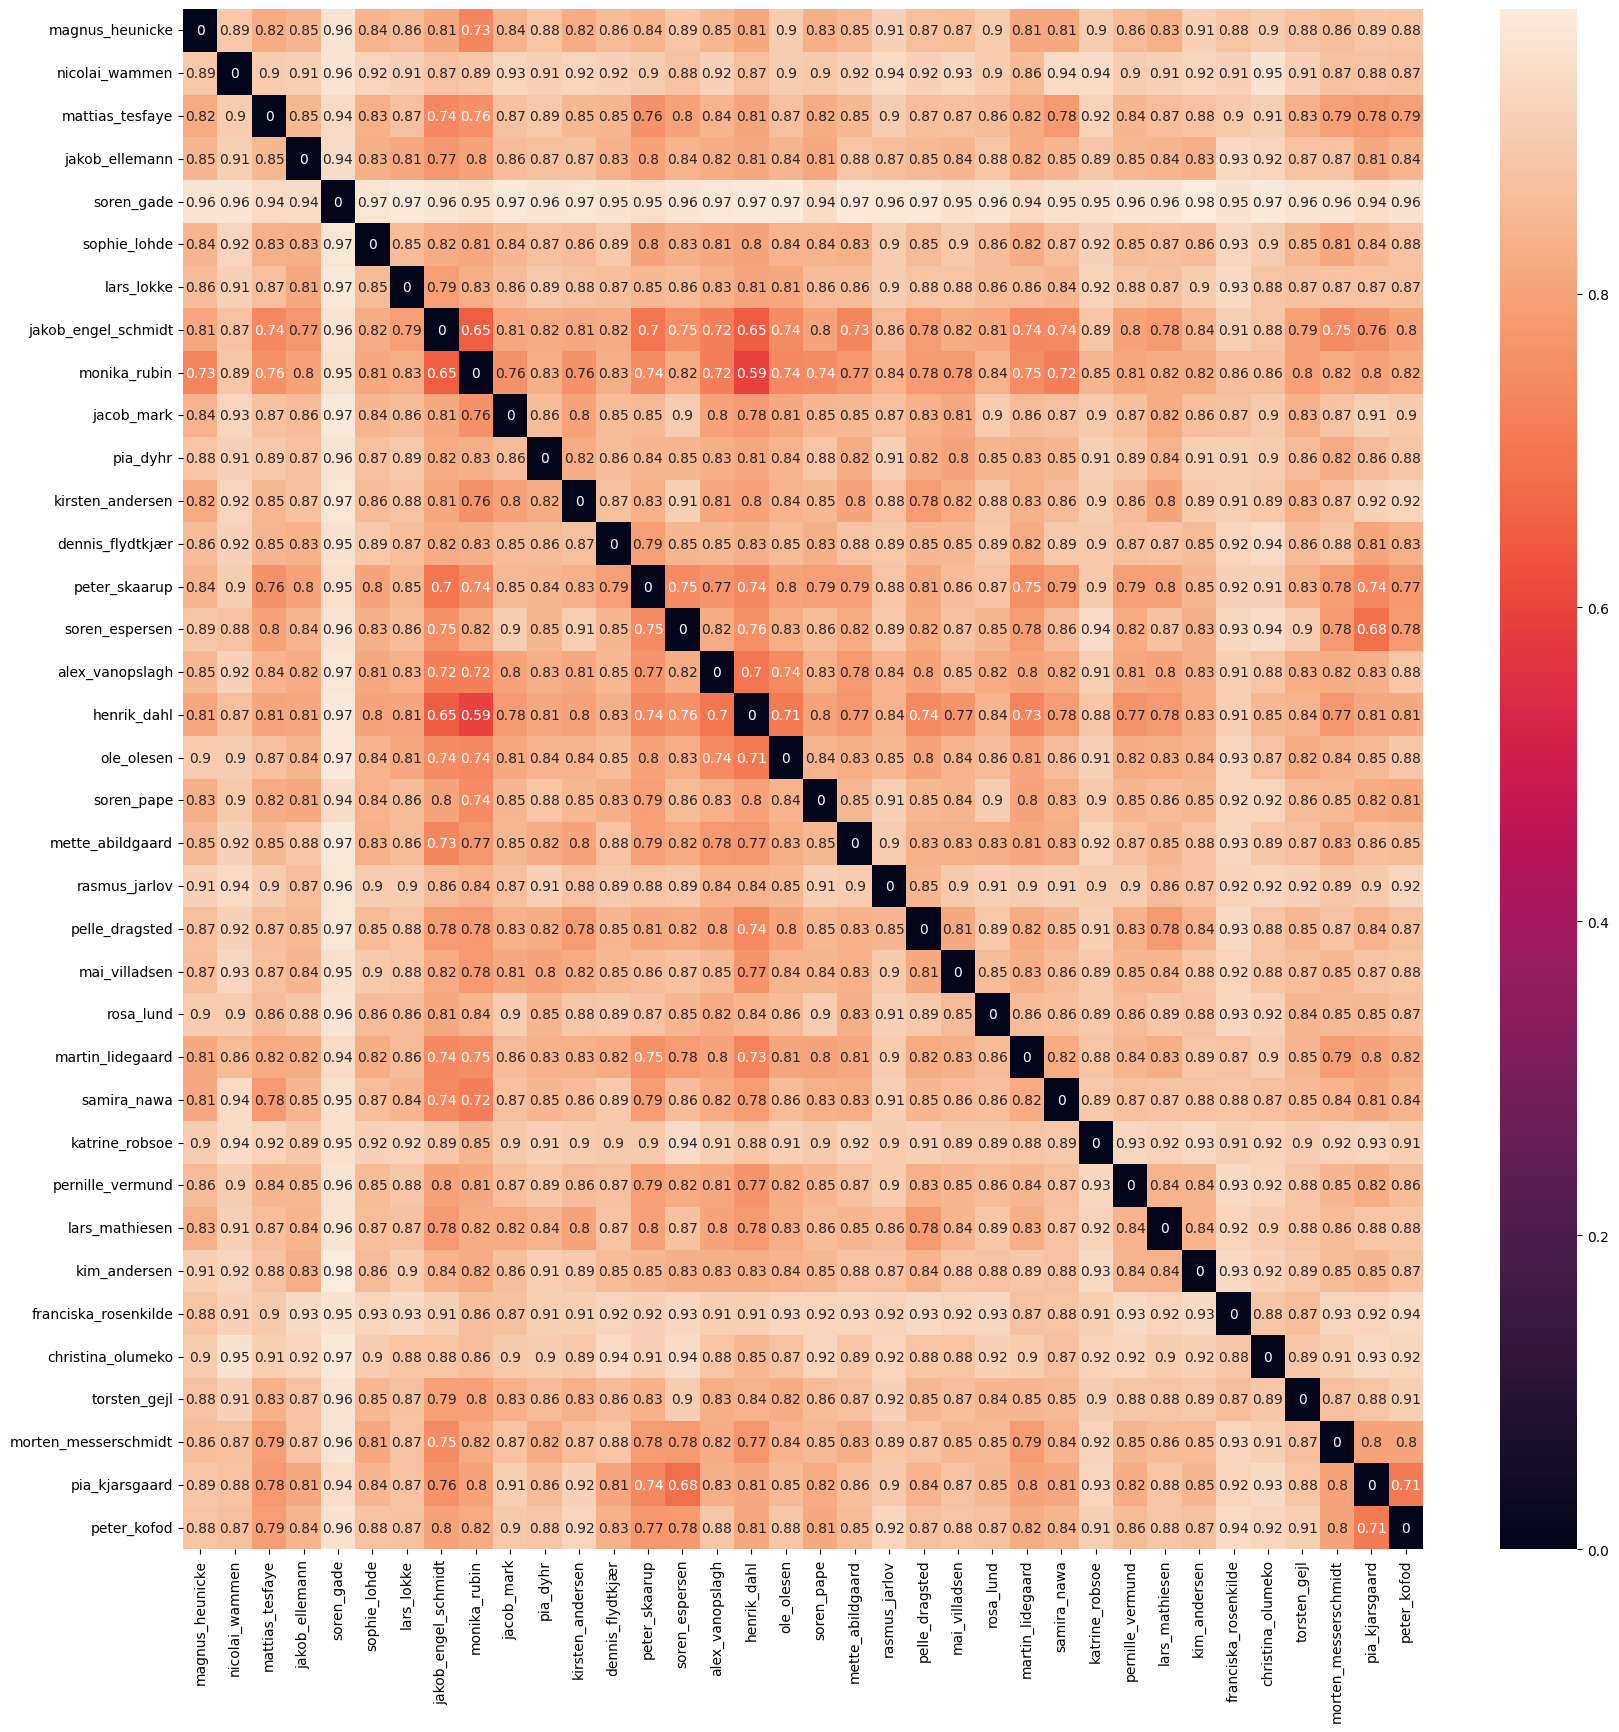

In [ ]:
heatmap_data = df_politicians.copy()

fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(heatmap_data, ax=ax, xticklabels=True, yticklabels=True, annot=True)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=30797f9c-952e-45b4-98d4-31c9ac73ae78' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>